Prepare fasttext file

In [1]:
import pandas as pd
data = pd.read_json("bcs_polsent.jsonl", orient="records", lines=True)
data.columns

Index(['sentence', 'country', 'type', 'annotator1', 'annotator2', 'gold',
       'reconciliation_hard', 'id_meta', 'term', 'doc_id', 'sentence_id',
       'date', 'fullname', 'party', 'gender', 'yob', 'edu_y', 'ideology',
       'no_seats', 'ruling', 'label', 'origin', 'split'],
      dtype='object')

In [2]:
data = data.loc[ :, ["sentence", "label", "split", "country"]]


In [3]:
train = data[data.split=="train"]
test = data[data.split=="test"]
dev = data[data.split=="dev"]

In [4]:
!mkdir fasttext_data

mkdir: cannot create directory ‘fasttext_data’: File exists


In [5]:
with open("fasttext_data/train.txt", "w") as f:
    for i, row in train.iterrows():
        f.write(f"__label__{row['label']} {row['sentence']}\n")
with open("fasttext_data/test.txt", "w") as f:
    for i, row in test.iterrows():
        f.write(f"__label__{row['label']} {row['sentence']}\n")
with open("fasttext_data/dev.txt", "w") as f:
    for i, row in dev.iterrows():
        f.write(f"__label__{row['label']} {row['sentence']}\n")

In [6]:
import fasttext

Fasttext embeddings obtained from http://hdl.handle.net/11356/1205

In [7]:
import numpy as np
from sklearn.metrics import f1_score
f1s = []
for i in range(50):
    model = fasttext.train_supervised(input="fasttext_data/train.txt", epoch = 16)
    y_pred = model.predict(test.sentence.tolist())[0]
    y_pred = [i[0][9:] for i in y_pred]
    y_true = test.label.tolist()

    f1 = f1_score(
        y_true, y_pred, average="macro", labels=["Positive", "Neutral", "Negative"]
    )
    f1s.append(f1)

print(f"macro f1 on test: {np.mean(f1s):0.4f} +/- {np.std(f1s):0.4f}, sample of {len(f1s)}")

macro f1 on test: 0.4733 +/- 0.0086, sample of 50


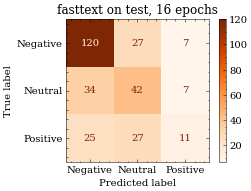

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
plt.style.use("science no-latex".split())

ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", labels=["Negative", "Neutral", "Positive"])
plt.title("fasttext on test, 16 epochs")
plt.savefig("images/004_CM_fasttext.png")
plt.savefig("images/004_CM_fasttext.pdf")
plt.show()

In [10]:
import numpy as np
from sklearn.metrics import f1_score

f1s = []
from tqdm.auto import tqdm
for i in tqdm(range(10)):
    model = fasttext.train_supervised(
        input="fasttext_data/train.txt",
        epoch=5,
        pretrainedVectors="fasttext_embeddings/embed.hr-token.ft.sg.vec",
    )
    y_pred = model.predict(test.sentence.tolist())[0]
    y_pred = [i[0][9:] for i in y_pred]
    y_true = test.label.tolist()

    f1 = f1_score(
        y_true, y_pred, average="macro", labels=["Positive", "Neutral", "Negative"]
    )
    f1s.append(f1)

print(
    f"macro f1 with embeddings on test: {np.mean(f1s):0.4f} +/- {np.std(f1s):0.4f}, sample of {len(f1s)}"
)


  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
plt.style.use("science no-latex".split())

ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", labels=["Negative", "Neutral", "Positive"])
plt.title("fasttext on test, 5 epochs, with embeddings")
plt.savefig("images/004_CM_fasttext_with_embeddings.png")
plt.savefig("images/004_CM_fasttext_with_embeddings.pdf")
plt.show()